# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`.

In [2]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load data
df_tfl = pd.read_csv('/content/drive/MyDrive/Cambridge/Second Year/IB-Data-Science/Exercises/tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [5]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [6]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 3a) Plot the data in a scatterplot

Text(0.5, 1.0, 'Plot of Tube Totals from 1 April 2000 to 2 Feb 2019')

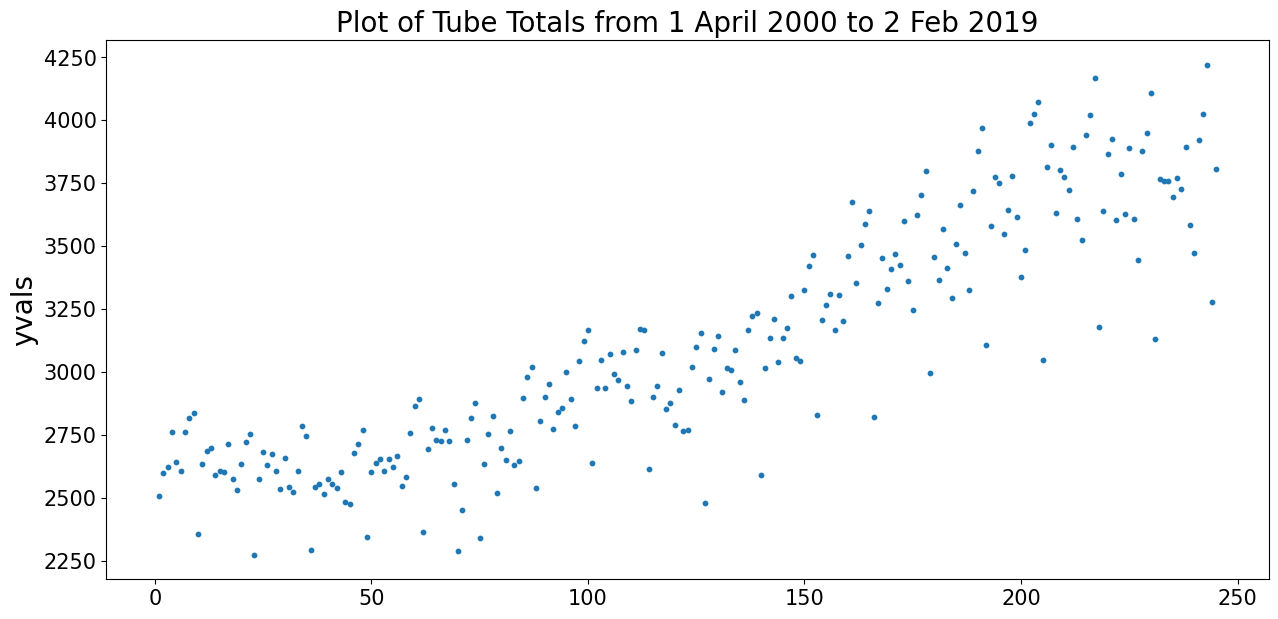

In [7]:
#Your code for scatterplot here
import matplotlib.pyplot as plt
# Set parameters to make sure figures are large enough. You can try changing these
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.scatter(xvals, yvals, s=10) # s can be used to adjust the size of the dots plt.xlabel('xvals')
plt.ylabel('yvals')
plt.title('Plot of Tube Totals from 1 April 2000 to 2 Feb 2019')

## 3b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares.
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta_0: 2367.382
beta_1: 5.939
MSE: 45323.636
R^2: 0.796


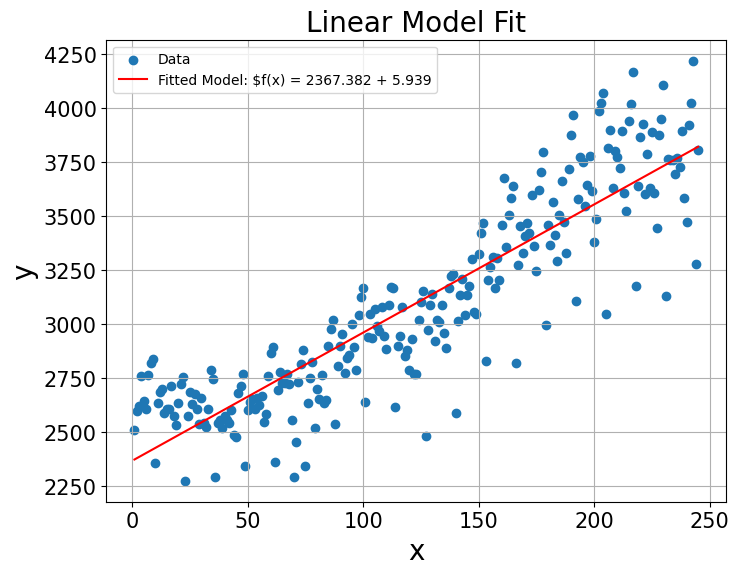

In [8]:
#Your code here
A = np.column_stack([np.ones_like(xvals), xvals]) # linear regression
beta = np.linalg.lstsq(A, yvals, rcond=None)[0]
# coefficients
beta_0 = beta[0]
beta_1 = beta[1]
print("beta_0:", "{:.3f}".format(beta_0))
print("beta_1:", "{:.3f}".format(beta_1))
# fitted values
fitted_values = beta_0 + beta_1 * xvals # mean squared error (MSE)
mse = np.mean((fitted_values - yvals) ** 2)
# R^2
y_mean = np.mean(yvals)
ss_total = np.sum((yvals - y_mean) ** 2)
ss_residual = np.sum((fitted_values - yvals) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print("MSE:", "{:.3f}".format(mse))
print("R^2:", "{:.3f}".format(r_squared))
# Plot fitted model and scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(xvals, yvals, label='Data')
plt.plot(xvals, fitted_values,'r',label=f'Fitted Model: $f(x) = {beta_0:.3f} + {beta_1:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()


## 3c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

Mean of residuals 0.0
Sum of squared errors SSE for quadratic model is: 11104290.801
Mean squared error MSE for quadratic model is: 45323.636


Text(0, 0.5, 'Residuals')

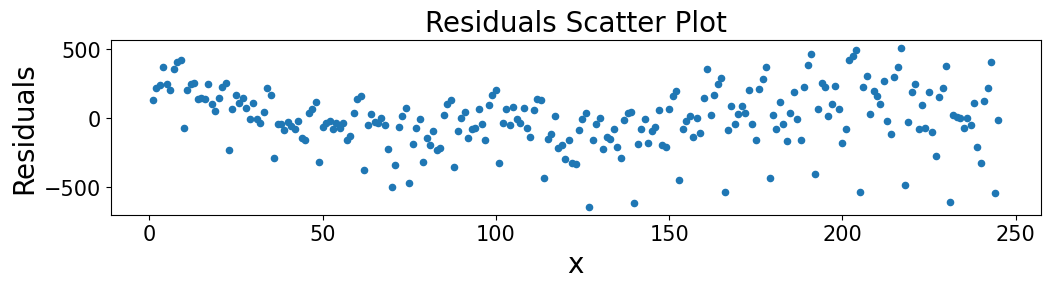

In [9]:
# Your code here
residuals = yvals - fitted_values
SSE_quad = np.linalg.norm(residuals)**2
MSE_quad = SSE_quad/np.size(yvals)
print('Mean of residuals', np.round(np.mean(residuals),3))
print('Sum of squared errors SSE for quadratic model is:', np.round(SSE_quad,3))
print('Mean squared error MSE for quadratic model is:', np.round(MSE_quad,3))
plt.rcParams['figure.figsize'] = [12, 5]
plt.subplot(211)
plt.scatter(xvals, residuals, s=20)
plt.title('Residuals Scatter Plot')
plt.xlabel('x')
plt.ylabel('Residuals')


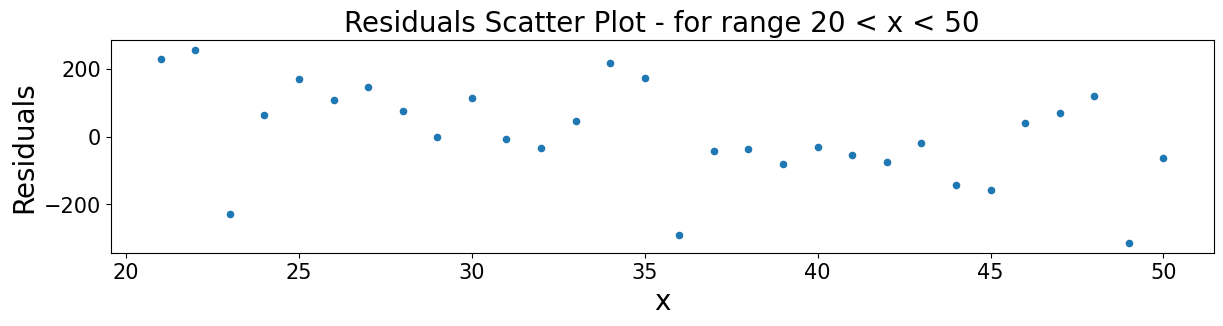

In [10]:
# zoom into x values between 20 and 50
plt.subplot(212)
plt.scatter(xvals[20:50], residuals[20:50], s=20)
plt.tight_layout()
plt.title('Residuals Scatter Plot - for range 20 < x < 50')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.savefig('residuals.pdf', bbox_inches = 'tight')

< Comment on periodic components here >

We can see slight periodic behaviour, with the start of the wavelengths at approximately 23, 36, 49.

### 3d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum.


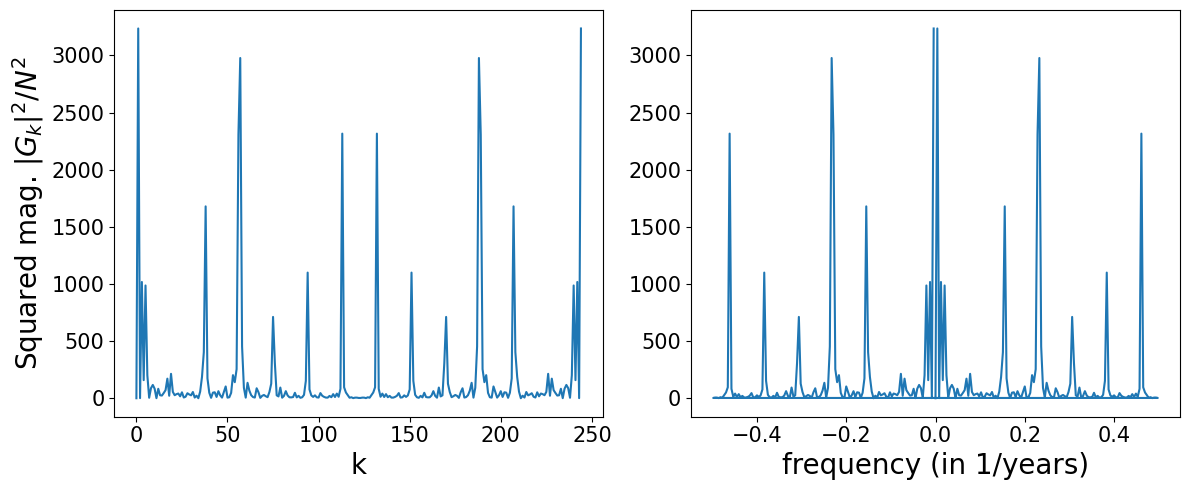

In [11]:
# Your code to compute and plot the periodogram
N = np.size(xvals)
T = xvals[51] - xvals[50] # This can be the time interval between any two success
# Compute the squared magnitudes of the DFT coefficients
pgram = np.abs(np.fft.fft(residuals)/N)**2
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = np.fft.fftfreq(N)/T
freqs_in_rads = freqs_in_hz*2*math.pi
plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency (in 1/years)') # Since units of T is years plt.savefig('DFT.pdf', bbox_inches = 'tight')
plt.tight_layout()


In [12]:
# Your code to identify the indices for which the periodogram value exceeds 50% of
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_in_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds, '\nTop frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.] 
Top frequencies in Hz: [ 0.00408163  0.15510204  0.22857143  0.23265306  0.46122449 -0.46122449
 -0.23265306 -0.22857143 -0.15510204 -0.00408163]


## 3e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares.

All numerical outputs should be displayed to three decimal places.

In [16]:
# design matrix with sine and cosine terms corresponding to identified frequencies
K = len(top_freqs_hz)
X = np.zeros((N, 2*K))
for i, freq_index in enumerate(top_inds):
  freq = i
  X[:, 2*i] = np.sin(2 * np.pi * freq * xvals)
  X[:, 2*i + 1] = np.cos(2 * np.pi * freq * xvals)

# least-squares regression
beta_resid = abs(np.linalg.lstsq(X, residuals, rcond=None)[0])**0.1

# values of regression coefficients obtained using least-squares
print("Regression coefficients obtained using least-squares:")
for i, beta_val in enumerate(beta_resid):
  print(f"beta_{i+1}: {beta_val:.3f}")


Regression coefficients obtained using least-squares:
beta_1: 0.000
beta_2: 8.474
beta_3: 16.209
beta_4: 8.244
beta_5: 17.372
beta_6: 8.244
beta_7: 22.315
beta_8: 8.244
beta_9: 18.619
beta_10: 8.244
beta_11: 23.445
beta_12: 8.244
beta_13: 23.917
beta_14: 8.244
beta_15: 25.246
beta_16: 8.244
beta_17: 19.956
beta_18: 8.244
beta_19: 21.913
beta_20: 10.306


### 3f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

In [19]:
# Your code here
# least-squares regression for sinusoidal model
X_sine_cosine = {np.sin(freq), np.cos(freq)}
beta_sine_cosine = np.linalg.lstsq(X_sine_cosine, residuals, rcond=None)[0]
# combined fit
fitted_sine_cosine = np.dot(X_sine_cosine, beta_sine_cosine)
combined_fit = fitted_values + fitted_sine_cosine
# plot combined fit and scatterplot of data
plt.figure(figsize=(10, 6))
plt.scatter(xvals, yvals, label='Data')
plt.plot(xvals, combined_fit, 'r', label='Combined Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Combined Fit vs. Data')
plt.legend()
plt.grid(True)
plt.show()
# final MSE and R^2
mse_combined = np.mean((combined_fit - yvals)**2)
ss_total = np.sum((yvals - np.mean(yvals))**2)
r_squared_combined = 1 - (mse_combined / ss_total)
print("Final MSE for combined fit:", "{:.3f}".format(mse_combined))
print("Final R^2 coefficient for combined fit:", "{:.3f}".format(r_squared_combined))


LinAlgError: 0-dimensional array given. Array must be two-dimensional

< Add comment on the improvement over the linear fit. >